# High Impact Keywords that Maximize Profit

## Import data

In [40]:
#Author: Alex Moore

import pandas as pd
import numpy as np

# Read in data 
data = pd.read_csv('tmdb_movies_data.csv')

## Process Data

In [41]:
# Author: Alex Moore

# Fill in missing features
num_cols = ['budget_adj', 'revenue_adj']
for col in num_cols:
        mean = data[col].mean()
        data[col].fillna(mean, inplace=True)

# Calculate difference between revenue_adj and budget_adj to create profit column
data['profit'] = data['revenue_adj'] - data['budget_adj']
data['profit'] = data['profit'].round()

# Parse keywords column
data['keyword_list'] = data['keywords'].str.split('|')

# Replace missing values with empty string
data['keywords'].fillna('no_value', inplace=True)

# Save updata data to new CSV file
data.to_csv('updated_data.csv', index=False)

## Create Data Visualizations

### Top 20 Most Popular Keywords

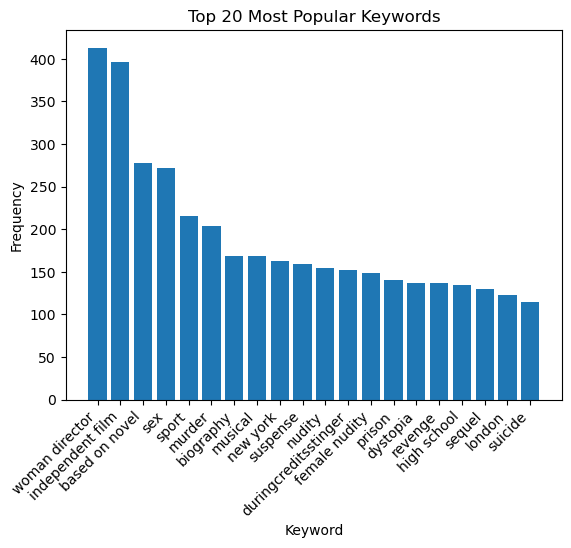

woman director: 413
independent film: 396
based on novel: 278
sex: 272
sport: 216
murder: 204
biography: 169
musical: 169
new york: 163
suspense: 159
nudity: 154
duringcreditsstinger: 152
female nudity: 149
prison: 140
dystopia: 137
revenge: 137
high school: 135
sequel: 130
london: 123
suicide: 115


In [42]:
#Author: Alex Moore

from collections import Counter
import matplotlib.pyplot as plt

# Concatenate all keyword lists into a single list
keywords = []
for k_list in data['keyword_list']:
    if isinstance(k_list, list):
        keywords += k_list

# Count the occurrences of each keyword
keyword_counts = Counter(keywords)

# Get the top 10 most common keywords
top_keywords = keyword_counts.most_common(20)

# Create a bar plot of the top keywords
plt.bar([kw[0] for kw in top_keywords], [kw[1] for kw in top_keywords])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Top 20 Most Popular Keywords')
plt.show()

# Print list of top keywords
# List of top keywords
top_keywords = dict(keyword_counts.most_common(20))
for keyword, count in top_keywords.items():
    print(f'{keyword}: {count}')

### Top 20 Highest Profit Films 

In [43]:
#Author: Alex Moore

# Sort the DataFrame by 'profit' column in descending order and select the top 20 rows
top_20_films = data.sort_values('profit', ascending=False).head(20)

# Display the 'original_title' and 'keywords' columns for the top 20 films
for index, row in top_20_films.iterrows():
    print(f"{row['original_title']}")
    print(f"Keywords: {row['keyword_list']}\n")

Star Wars
Keywords: ['android', 'galaxy', 'hermit', 'death star', 'lightsaber']

Avatar
Keywords: ['culture clash', 'future', 'space war', 'space colony', 'society']

Titanic
Keywords: ['shipwreck', 'iceberg', 'ship', 'panic', 'titanic']

The Exorcist
Keywords: ['exorcism', 'holy water', 'religion and supernatural', 'vomit', 'christian']

Jaws
Keywords: ['fishing', 'atlantic ocean', 'bathing', 'shipwreck', 'police chief']

E.T. the Extra-Terrestrial
Keywords: ['farewell', 'homesickness', 'nasa', 'extraterrestrial technology', 'operation']

Star Wars: The Force Awakens
Keywords: ['android', 'spaceship', 'jedi', 'space opera', '3d']

The Net
Keywords: ['cheating', 'new identity', 'computer virus', 'chase', 'computer']

One Hundred and One Dalmatians
Keywords: ['puppy', 'animation', 'dog', 'dalmatian']

The Empire Strikes Back
Keywords: ['rebel', 'asteroid', 'space battle', 'snow storm', 'space colony']

The Jungle Book
Keywords: ['indian', 'snake', 'lion', 'musical', 'feral child']

Jura

### Top 20 Keywords for Films with Highest Profit

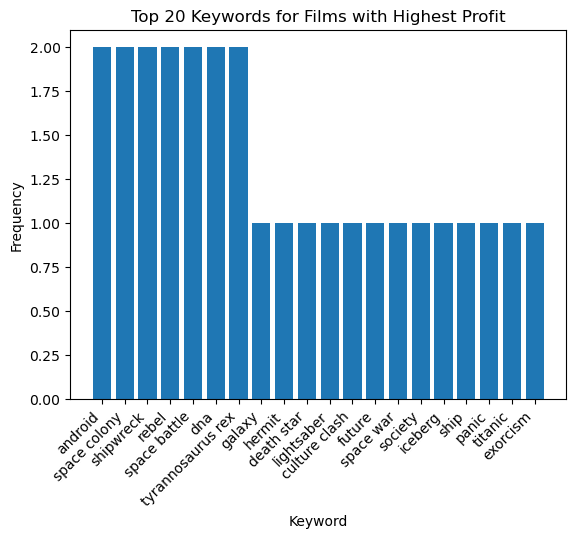

In [44]:
#Author: Alex Moore

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Sort the DataFrame by 'profit' column in descending order and select the top 20 rows
top_20_films = data.sort_values('profit', ascending=False).head(20)

# Concatenate all non-null keyword lists for the top 20 films into a single list
keywords = []
for k_list in top_20_films['keyword_list']:
    if isinstance(k_list, list):
        keywords += k_list

# Count the occurrences of each keyword
keyword_counts = Counter(keywords)

# Plot a bar chart of the top 10 most common keywords
top_keywords = dict(keyword_counts.most_common(20))
plt.bar(top_keywords.keys(), top_keywords.values())
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Keywords for Films with Highest Profit')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()


### Most Popular Keywords Wordcloud

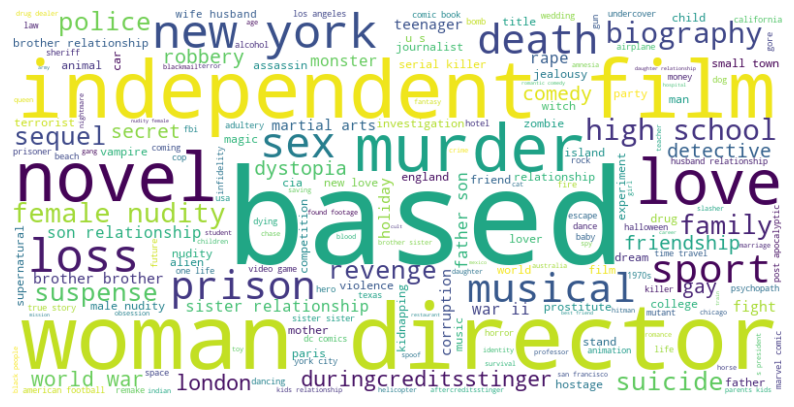

In [45]:
#Author: Alex Moore

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all non-null keyword lists into a single string
keywords = ""
for k_list in data['keyword_list']:
    if isinstance(k_list, list):
        keywords += " ".join(k_list) + " "

# Generate a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(keywords)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Most Popular Keywords based on Profit Wordcloud

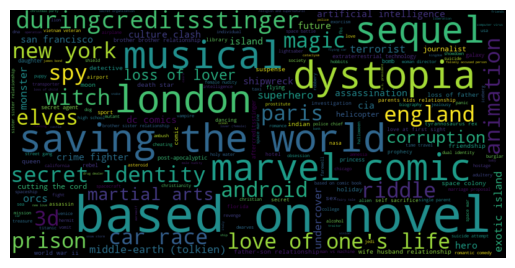

In [46]:
#Author: Alex Moore

from collections import defaultdict

# Create a new DataFrame containing only the original_title, keywords, and profit columns
df = data[['original_title', 'keywords', 'profit']]

# Drop any rows with null values in the keywords or profit columns
df = df.dropna(subset=['keywords', 'profit'])

# Create a dictionary mapping each keyword to its frequency, weighted by the profit of the movie it appears in
keyword_counts = defaultdict(float)
for row in df.itertuples():
    keywords = row.keywords.split('|')  # use pipe as delimiter
    profit = row.profit
    for keyword in keywords:
        keyword_counts[keyword] += profit

# Create a word cloud using the wordcloud library
wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(keyword_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Split Data into Test and Training Sets

In [47]:
#Author: Alex Moore

from sklearn.model_selection import train_test_split

# Specify independent and dependent variables
X = data['keywords'].str.get_dummies(sep='|')  # Convert keywords column into binary dummy variables
y = data['profit']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [48]:
#Author: Alex Moore

import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree regressor
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Extract feature importances from the trained decision tree
feature_importances = dt_classifier.feature_importances_
keyword_columns = X.columns

# Create a dictionary to store keyword and their corresponding feature importance
keyword_importance_dict = dict(zip(keyword_columns, feature_importances))

# Sort the keywords by feature importances in descending order
sorted_keywords = sorted(keyword_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the keywords and their corresponding feature importances, excluding "no_value" and limiting to first 30 values
print("Keywords with their corresponding feature importances (limited to first 30 values):")
for i, (keyword, importance) in enumerate(sorted_keywords):
    if keyword != "no_value" and i < 30:
        print(f"{keyword}: {importance}")

Keywords with their corresponding feature importances (limited to first 30 values):
sex: 0.004055558004186463
biography: 0.0035930604800422823
female nudity: 0.0034389197255726743
woman director: 0.0031060520970337753
suicide: 0.002742283993452525
high school: 0.0027187673132001117
paris: 0.0024685875699842637
sequel: 0.0024378784289662094
detective: 0.0023476394169764706
independent film: 0.0021108551486049977
infidelity: 0.0021094221208869278
alcohol: 0.0020933688001431696
love of one's life: 0.00202465196647963
zombies: 0.0020213190404133846
island: 0.0020117465521435358
secret: 0.0020069084858258075
male nudity: 0.002004710915521483
police: 0.0019581649010147794
suspense: 0.0019398605063282613
superhero: 0.001905922395285324
london: 0.0018576494445903327
hostage: 0.0018349352862384182
musical: 0.0018329136868575964
baseball: 0.0018309891009044416
party: 0.0018286022516598823
serial killer: 0.0018140075217479988
gay: 0.0018017476724582963
murder: 0.001756891365757136
bomb: 0.0016944

## Random Forest

In [49]:
#Author: Alex Moore

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the decision tree regressor
rf_classifier = RandomForestClassifier(n_estimators = 50, random_state=42)
rf_classifier.fit(X_train, y_train)

# Extract feature importances from the trained Random Forest
feature_importances = rf_classifier.feature_importances_
keyword_columns = X.columns

# Create a dictionary to store keyword and their corresponding feature importance
keyword_importance_dict = dict(zip(keyword_columns, feature_importances))

# Sort the keywords by feature importances in descending order
sorted_keywords = sorted(keyword_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the keywords and their corresponding feature importances, excluding "no_value" and limiting to first 30 values
print("Keywords with their corresponding feature importances (limited to first 30 values):")
for i, (keyword, importance) in enumerate(sorted_keywords):
    if keyword != "no_value" and i < 30:
        print(f"{keyword}: {importance}")

Keywords with their corresponding feature importances (limited to first 30 values):
sex: 0.0031420574346520853
independent film: 0.0027982308248565495
based on novel: 0.0027796127508410207
murder: 0.0027655813549869812
woman director: 0.0026825638918016857
biography: 0.002667277929463115
revenge: 0.002465375393379491
female nudity: 0.0024267967171637582
nudity: 0.002200636049708655
suicide: 0.0021790355703886883
new york: 0.0021241911199078064
high school: 0.0021170188528405183
sport: 0.0021148963383319686
musical: 0.0020951963481529467
london: 0.0020488212273203797
sequel: 0.0020422317469884943
duringcreditsstinger: 0.002038375502982084
detective: 0.002020632477331751
police: 0.0020035101777626982
prison: 0.0019729781487713067
suspense: 0.0018963925975418539
father-son relationship: 0.0016169823035401334
paris: 0.0016148185965218784
alcohol: 0.0016147144661500044
rape: 0.0015968525619250806
friendship: 0.0015539363836450384
dystopia: 0.0015345593878518882
prostitute: 0.001480114987970

### Accuracy of Decision Tree and Random Forest

Text(0, 0.5, 'Keyword')

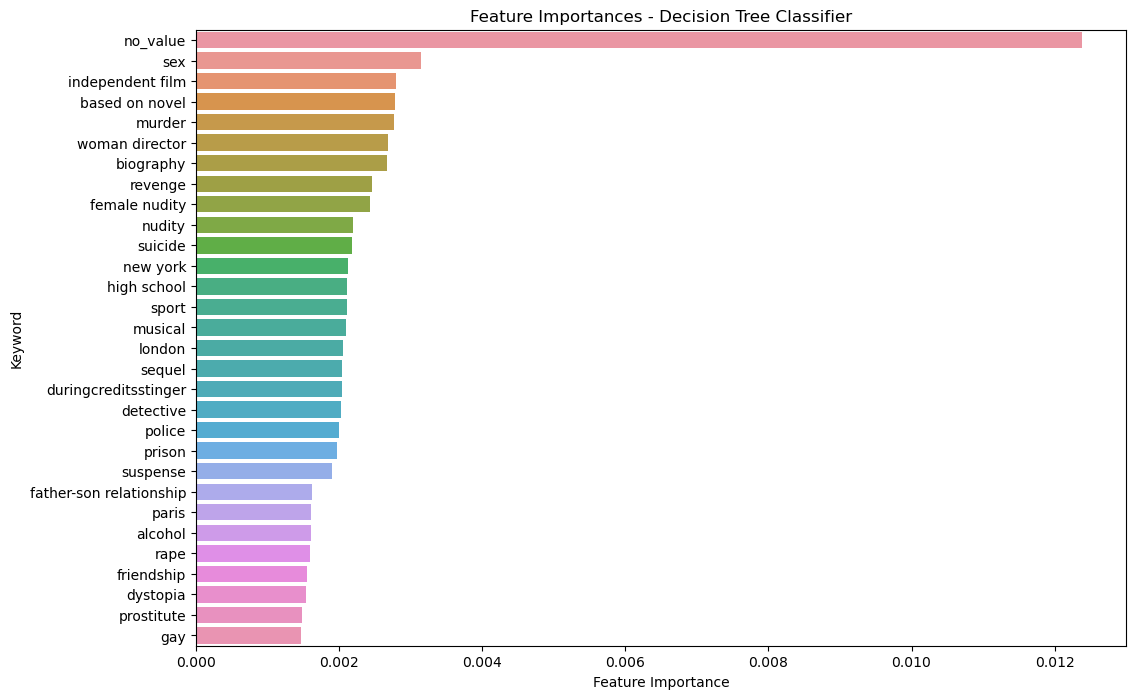

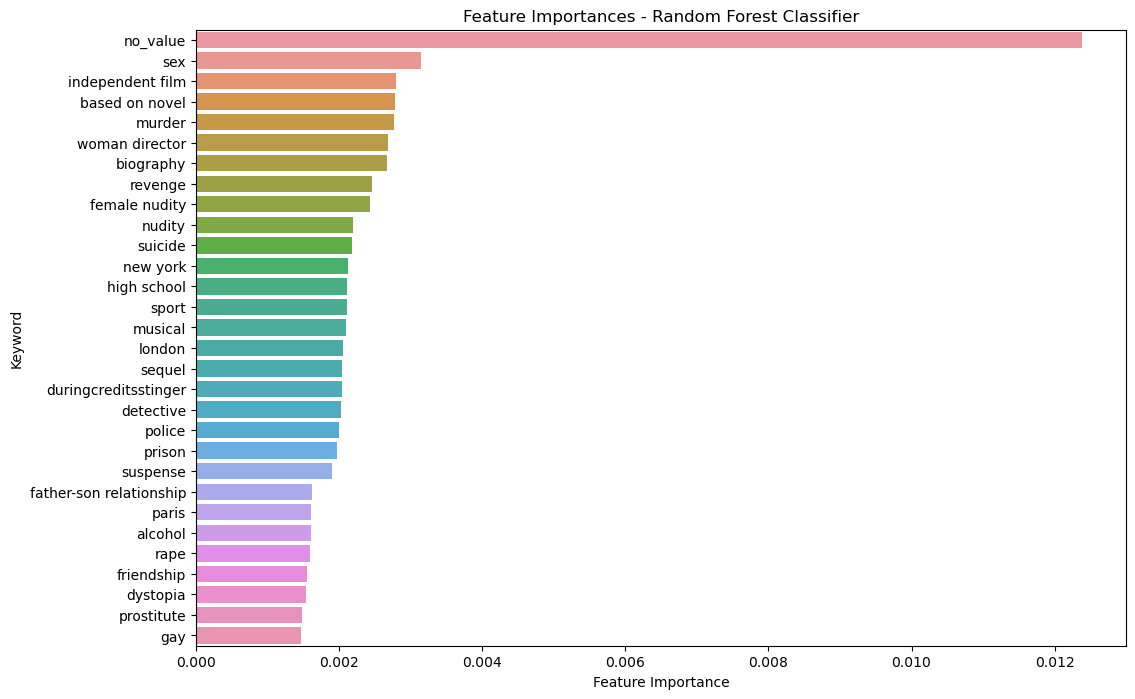

In [56]:
# Author: Alex Moore

import seaborn as sns

# Plot feature importances for Decision Tree classifier
plt.figure(figsize=(12, 8))
sns.barplot(x=[x[1] for x in sorted_keywords][:30], y=[x[0] for x in sorted_keywords][:30])
plt.title("Feature Importances - Decision Tree Classifier")
plt.xlabel("Feature Importance")
plt.ylabel("Keyword")

# Plot feature importances for Random Forest classifier
plt.figure(figsize=(12, 8))
sns.barplot(x=[x[1] for x in sorted_keywords][:30], y=[x[0] for x in sorted_keywords][:30])
plt.title("Feature Importances - Random Forest Classifier")
plt.xlabel("Feature Importance")
plt.ylabel("Keyword")

In [52]:
#Author: Alex Moore

from sklearn.metrics import accuracy_score

# Predict using the Decision Tree classifier
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the accuracy of the Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree classifier: {accuracy_dt:.2f}")

# Predict using the Random Forest classifier
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the accuracy of the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Decision Tree classifier: {accuracy_dt:.2f}")

Accuracy of Decision Tree classifier: 0.34
Accuracy of Decision Tree classifier: 0.34
